In [1]:
import json
from collections import defaultdict

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from scipy import stats

In [3]:
with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-2/10/config.json", 'r') as f:
    config = json.load(f)
with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-2/10/info.json", 'r') as f:
    try:
        info = json.load(f)
    except:
        pass

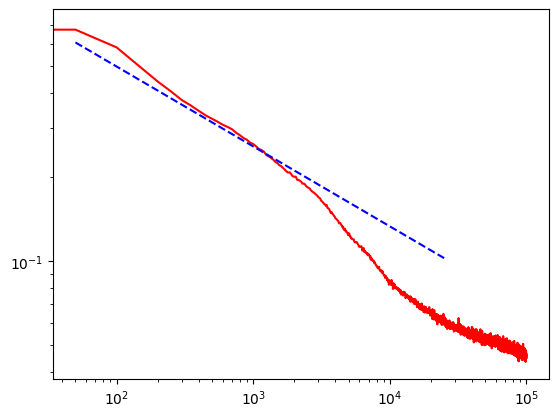

In [10]:
plt.plot(info['log_steps'], info['losses'], color='red', label="total loss")

lxs = np.linspace(info['log_steps'][1], info['log_steps'][500], 2)
lys = 0.9*(info['losses'][1] / np.power(lxs[0], -(config['alpha'] - 1)/config['alpha'])) * np.power(lxs, -(config['alpha'] - 1)/config['alpha'])
plt.plot(lxs, lys, color='blue', linestyle='dashed', label=r'N^(1 - α)/α')

plt.xscale('log')
plt.yscale('log')

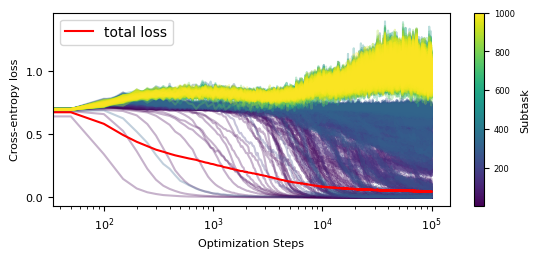

In [93]:
plt.figure(figsize=(5.5, 2.5))

ax = plt.subplot(1, 1, 1)

Ss = info['Ss']

plt.plot(info['log_steps'], info['losses'], color='red', label="total loss")

colors = plt.cm.viridis(np.linspace(0.0, 1.0, len(Ss)))
for i in range(len(Ss)):
    plt.plot(info['log_steps'], info['losses_subtasks'][str(i)], color=colors[i], alpha=0.3, zorder=-10)

# add a colorbar from the range 1 to len(Ss)
cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=1, vmax=len(Ss)), cmap='viridis'), ax=ax)
cbar.ax.tick_params(labelsize=6)
cbar.ax.set_ylabel("Subtask", fontsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=len(Ss)))
# change the below line to use a correct matplotlib.colors function
# cbar = plt.colorbar(plt.cm.ScalarMappable(matplotlib.colors.Norm(vmin=1, vmax=len(Ss)), plt.cm.viridis))
# cbar.ax.tick_params(labelsize=7)
# cbar.set_ticks([1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
# cbar.ax.set_ylabel("Subtask", fontsize=7)

# plt.xlim(0, 1000)
plt.ylabel("Cross-entropy loss", fontsize=8)
plt.xlabel("Optimization Steps", fontsize=8)
plt.xscale('log')
plt.legend()

plt.tight_layout(pad=0.4)
plt.savefig('../figures/parity-subtask-timeseries-0.jpg', dpi=350)


In [8]:
Ps = []
losses = []
for i in range(1, 21, 1):
    with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-2/{i}/config.json", 'r') as f:
        config = json.load(f)
    with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-2/{i}/info.json", 'r') as f:
        try:
            info = json.load(f)
            Ps.append(info['P'])
            losses.append(info['losses'][-1])
        except:
            pass


In [30]:
Ps, losses = zip(*sorted(zip(Ps, losses), key=lambda x: x[0]))

In [42]:
Ps_nice = Ps[:10]
losses_nice = losses[:10]

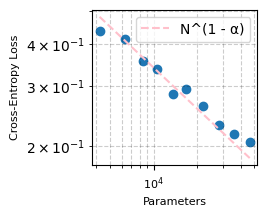

In [77]:
plt.figure(figsize=(2.5, 2))

ax = plt.subplot(1, 1, 1)

plt.scatter(Ps_nice, losses_nice)
lxs = np.linspace(Ps_nice[0], Ps_nice[-1], 2)
lys = 1.1*(losses_nice[0] / np.power(lxs[0], -(config['alpha'] - 1))) * np.power(lxs, -(config['alpha'] - 1))
plt.plot(lxs, lys, color='pink', linestyle='dashed', label=r'N^(1 - α)')

# plt.xlim(1e3, 5*10**4)
# plt.ylim(1.5e-1, 5e-1)
plt.xlabel("Parameters", fontsize=8)
plt.ylabel("Cross-Entropy Loss", fontsize=8)
# reduce y axis tick label size
# plt.tick_params(axis='y', labelsize=3)
plt.xticks(fontsize=8)
# plt.yticks(fontsize=8)
# ax.tick_params(axis='y', labelsize=4)

# add grid ticks
plt.grid(which='both', color='k', linestyle='--', alpha=0.2)

plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.tight_layout(pad=0.1)
plt.savefig('../figures/parity-scaling-0.pdf')


### P-scaling-4

In [4]:
Ps = []
losses = []
for i in range(1, 31, 1):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/config.json", 'r') as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/info.json", 'r') as f:
            info = json.load(f)
            Ps.append(info['P'])
            losses.append(info['losses'][-1])
    except:
        pass


In [5]:
Ps, losses = zip(*sorted(zip(Ps, losses), key=lambda x: x[0]))

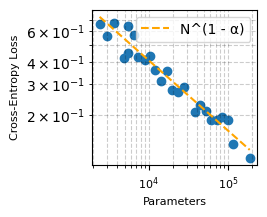

In [11]:
plt.figure(figsize=(2.5, 2))

ax = plt.subplot(1, 1, 1)

plt.scatter(Ps, losses)

lxs = np.linspace(Ps[0], Ps[-1], 2)
lys = 1.1*(losses[0] / np.power(lxs[0], -(config['alpha'] - 1))) * np.power(lxs, -(config['alpha'] - 1))
plt.plot(lxs, lys, color='orange', linestyle='dashed', label=r'N^(1 - α)')

# plt.xlim(1e3, 5*10**4)
# plt.ylim(1.5e-1, 5e-1)
plt.xlabel("Parameters", fontsize=8)
plt.ylabel("Cross-Entropy Loss", fontsize=8)
# reduce y axis tick label size
# plt.tick_params(axis='y', labelsize=3)
plt.xticks(fontsize=8)
# plt.yticks(fontsize=8)
# ax.tick_params(axis='y', labelsize=4)

# add grid ticks
plt.grid(which='both', color='k', linestyle='--', alpha=0.2)

plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.tight_layout(pad=0.1)
plt.savefig('../figures/parity-scaling-4.pdf')



In [19]:
Ps = []
n_stars = []
for i in range(1, 31, 1):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/config.json", 'r') as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/info.json", 'r') as f:
            info = json.load(f)
            Ps.append(info['P'])
            n_generalized = 0
            for i in range(config['n_tasks']):
                if info['accuracies_subtasks'][str(i)][-1] > 0.9:
                    n_generalized += 1
            n_stars.append(n_generalized)
    except:
        pass


In [20]:
Ps, n_stars = zip(*sorted(zip(Ps, n_stars), key=lambda x: x[0]))

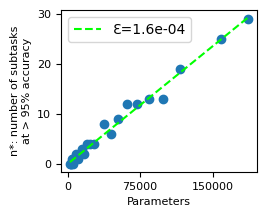

In [27]:
plt.figure(figsize=(2.5, 2))

ax = plt.subplot(1, 1, 1)

plt.scatter(Ps, n_stars)

lxs = np.linspace(Ps[0], Ps[-1], 2)
# lys = 1.1*(losses[0] / np.power(lxs[0], -(config['alpha'] - 1))) * np.power(lxs, -(config['alpha'] - 1))
# plt.plot(lxs, lys, color='orange', linestyle='dashed', label=r'N^(1 - α)')
# perform a linear regression on Ps, n_stars
slope, intercept, r_value, p_value, std_err = stats.linregress(Ps, n_stars)
lys = slope * lxs + intercept
plt.plot(lxs, lys, color='lime', linestyle='dashed', label=f'Ɛ={slope:.1e}')

# plt.xlim(1e3, 5*10**4)
# plt.ylim(1.5e-1, 5e-1)
plt.xlabel("Parameters", fontsize=8)
plt.ylabel("n*: number of subtasks\nat > 95% accuracy", fontsize=8)
# reduce y axis tick label size
# plt.tick_params(axis='y', labelsize=3)
plt.xticks([0, 75000, 150000], fontsize=8)
plt.yticks(fontsize=8)
# ax.tick_params(axis='y', labelsize=4)

# add grid ticks
# plt.grid(which='both', color='k', linestyle='--', alpha=0.2)

# plt.yscale('log')
# plt.xscale('log')
plt.legend()

plt.tight_layout(pad=0.1)
plt.savefig('../figures/parity-scaling-accuracies-4.pdf')



In [28]:
with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/25/config.json", 'r') as f:
    config = json.load(f)
with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/25/info.json", 'r') as f:
    try:
        info = json.load(f)
    except:
        pass

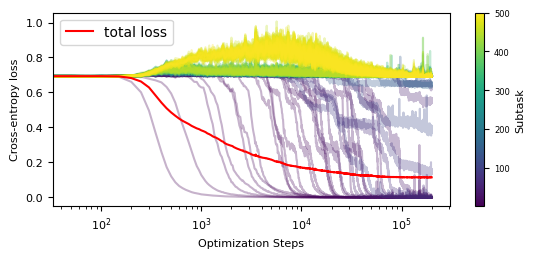

In [32]:
plt.figure(figsize=(5.5, 2.5))

ax = plt.subplot(1, 1, 1)

Ss = info['Ss']

plt.plot(info['log_steps'], info['losses'], color='red', label="total loss")

colors = plt.cm.viridis(np.linspace(0.0, 1.0, len(Ss)))
for i in range(len(Ss)):
    plt.plot(info['log_steps'], info['losses_subtasks'][str(i)], color=colors[i], alpha=0.3, zorder=-10)

# add a colorbar from the range 1 to len(Ss)
cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=1, vmax=len(Ss)), cmap='viridis'), ax=ax)
cbar.ax.tick_params(labelsize=6)
cbar.ax.set_ylabel("Subtask", fontsize=8)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# plt.xlim(0, 1000)
plt.ylabel("Cross-entropy loss", fontsize=8)
plt.xlabel("Optimization Steps", fontsize=8)
plt.xscale('log')
# plt.yscale('log')

# plt.ylim(0.1, 1)

plt.legend()

plt.tight_layout(pad=0.4)
plt.savefig('../figures/parity-subtask-timeseries-4.jpg', dpi=350)


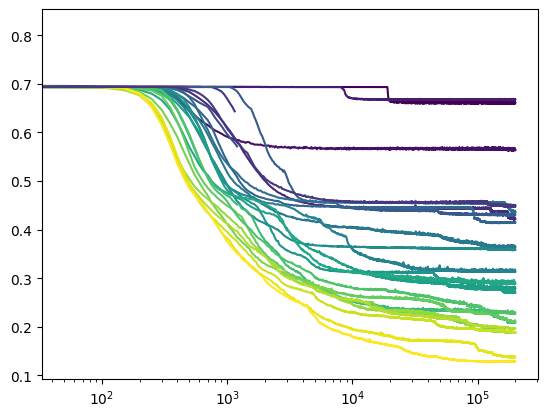

In [36]:
widths = []
for i in range(1, 31, 1):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/config.json", 'r') as f:
            config = json.load(f)
            widths.append(config['width']) 
    except:
        pass
widths = sorted(widths)


colors = plt.cm.viridis(np.linspace(0, 1, 26))
for i in range(1, 31, 1):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/config.json", 'r') as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/info.json", 'r') as f:
            info = json.load(f)
            log_steps = info['log_steps']
            losses = info['losses']
            plt.plot(log_steps, losses, color=colors[widths.index(config['width'])])
    except:
        pass
plt.xscale('log')
# plt.yscale('log')


In [4]:
Ps = []
accuracies_subtasks = defaultdict(dict)
for i in range(1, 31, 1):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/config.json", 'r') as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-4/{i}/info.json", 'r') as f:
            info = json.load(f)
            P = info['P']
            Ps.append(P)
            for j in range(config['n_tasks']):
                accuracies_subtasks[P][str(j)] = info['accuracies_subtasks'][str(j)][-1]
    except:
        pass

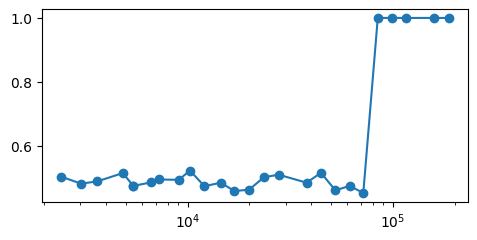

In [16]:
Ps = sorted(Ps)

plt.figure(figsize=(5.5, 2.5))
ax = plt.subplot(1, 1, 1)

subtasks = 



plt.plot(Ps, [accuracies_subtasks[P]["9"] for P in Ps], '-o')
plt.xscale('log')

In [7]:
Ds = []
losses = []
for i in tqdm(range(1, 31, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-1/{i}/config.json", 'r') as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/the-everything-machine/D-scaling-1/{i}/info.json", 'r') as f:
            info = json.load(f)
            losses.append(min(info['losses']))
            Ds.append(info['D'])
    except Exception as e:
        print(e)


  0%|          | 0/30 [00:00<?, ?it/s]

'losses'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/24/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/25/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/26/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/the-everything-machine/D-scaling-1/27/info.json'
'losses'


In [22]:
a = ['a', 'c', 'b']
b = [1, 3, 2]
a, b = zip(*sorted(zip(a, b), key=lambda x: x[1]))

In [21]:
sorted(list(zip(a, b)), key=lambda e: e[1])

[('a', 1), ('b', 2), ('c', 3)]

In [19]:
list(zip(sorted(list(zip(a, b)), key=lambda e: e[1])))

[(('a', 1),), (('b', 2),), (('c', 3),)]

In [ ]:
Ds, losses = 

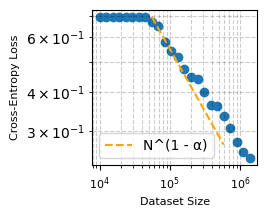

In [12]:
plt.figure(figsize=(2.5, 2))

ax = plt.subplot(1, 1, 1)

plt.scatter(Ds, losses)

lxs = np.linspace(Ds[6], Ds[-1], 20)
lys = 1.0*(losses[0] / np.power(lxs[0], -(config['alpha'] - 1))) * np.power(lxs, -(config['alpha'] - 1))
plt.plot(lxs, lys, color='orange', linestyle='dashed', label=r'N^(1 - α)')

# plt.xlim(1e3, 5*10**4)
# plt.ylim(1.5e-1, 5e-1)
plt.xlabel("Dataset Size", fontsize=8)
plt.ylabel("Cross-Entropy Loss", fontsize=8)
# reduce y axis tick label size
# plt.tick_params(axis='y', labelsize=3)
plt.xticks(fontsize=8)
# plt.yticks(fontsize=8)
# ax.tick_params(axis='y', labelsize=4)

# add grid ticks
plt.grid(which='both', color='k', linestyle='--', alpha=0.2)

plt.yscale('log')
plt.xscale('log')
plt.legend()

plt.tight_layout(pad=0.1)
# plt.savefig('../figures/parity-scaling-4.pdf')



In [52]:
Ps = defaultdict(list)
losses = defaultdict(list)
accuracies_subtasks = dict()
for i in range(1, 61, 1):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-5/{i}/config.json", 'r') as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-5/{i}/info.json", 'r') as f:
            info = json.load(f)
            alpha = config['alpha']
            P = info['P']
            Ps[alpha].append(P)
            if alpha not in accuracies_subtasks:
                accuracies_subtasks[alpha] = defaultdict(dict)
            losses[alpha].append(min(info['losses']))
            for j in range(config['n_tasks']):
                accuracies_subtasks[alpha][P][str(j)] = info['accuracies_subtasks'][str(j)][-1]

    except Exception as e:
        print(e)


Expecting value: line 1 column 1 (char 0)


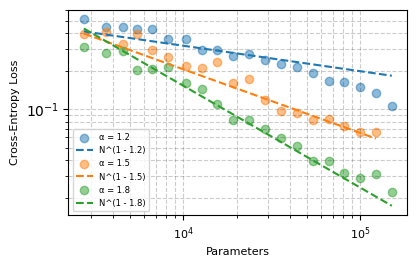

In [60]:
plt.figure(figsize=(4, 2.5))

ax = plt.subplot(1, 1, 1)

Ks = [0.8, 1, 1.4]
alphas = sorted(list(Ps.keys()))
colors = ['C0', 'C1', 'C2']
for i, a in enumerate(alphas):
    plt.scatter(Ps[a], losses[a], color=colors[i], alpha=0.5, label=f"α = {a}")
    lxs = np.linspace(Ps[a][0], Ps[a][-1], 2)
    lys = Ks[i]*(losses[a][0] / np.power(lxs[0], -(a - 1))) * np.power(lxs, -(a - 1))
    plt.plot(lxs, lys, color=colors[i], linestyle='dashed', label=f'N^(1 - {a})')

# plt.xlim(1e3, 5*10**4)
# plt.ylim(1.5e-1, 5e-1)
plt.xlabel("Parameters", fontsize=8)
plt.ylabel("Cross-Entropy Loss", fontsize=8)
# reduce y axis tick label size
# plt.tick_params(axis='y', labelsize=3)
plt.xticks(fontsize=8)
# plt.yticks(fontsize=8)
# ax.tick_params(axis='y', labelsize=4)

# add grid ticks
plt.grid(which='both', color='k', linestyle='--', alpha=0.2)

plt.yscale('log')
plt.xscale('log')
plt.legend(prop={'size': 6})

plt.tight_layout(pad=0.1)
plt.savefig('../figures/P-scaling-5-threealphas.pdf')



In [9]:
Ps = defaultdict(list)
losses = defaultdict(list)
accuracies_subtasks = dict()
for i in tqdm(range(1, 181, 1)):
    try:
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-6/{i}/config.json", 'r') as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/the-everything-machine/P-scaling-6/{i}/info.json", 'r') as f:
            info = json.load(f)
            alpha = config['alpha']
            P = info['P']
            Ps[alpha].append(P)
            if alpha not in accuracies_subtasks:
                accuracies_subtasks[alpha] = defaultdict(dict)
            losses[alpha].append(min(info['losses']))
            # for j in range(config['n_tasks']):
            #     accuracies_subtasks[alpha][P][str(j)] = info['accuracies_subtasks'][str(j)][-1]

    except Exception as e:
        print(e)


  0%|          | 0/180 [00:00<?, ?it/s]

Expecting ',' delimiter: line 1210013 column 25 (char 20946560)


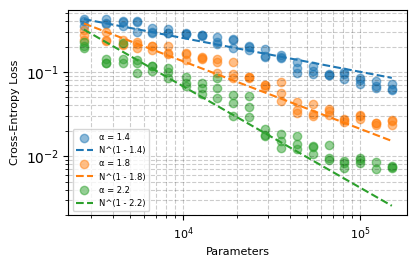

In [10]:
plt.figure(figsize=(4, 2.5))

ax = plt.subplot(1, 1, 1)

Ks = [1, 1.2, 1.4]
alphas = sorted(list(Ps.keys()))
colors = ['C0', 'C1', 'C2']
for i, a in enumerate(alphas):
    plt.scatter(Ps[a], losses[a], color=colors[i], alpha=0.5, label=f"α = {a}")
    lxs = np.linspace(Ps[a][0], Ps[a][-1], 2)
    lys = Ks[i]*(losses[a][0] / np.power(lxs[0], -(a - 1))) * np.power(lxs, -(a - 1))
    plt.plot(lxs, lys, color=colors[i], linestyle='dashed', label=f'N^(1 - {a})')

# plt.xlim(1e3, 5*10**4)
# plt.ylim(1.5e-1, 5e-1)
plt.xlabel("Parameters", fontsize=8)
plt.ylabel("Cross-Entropy Loss", fontsize=8)
# reduce y axis tick label size
# plt.tick_params(axis='y', labelsize=3)
plt.xticks(fontsize=8)
# plt.yticks(fontsize=8)
# ax.tick_params(axis='y', labelsize=4)

# add grid ticks
plt.grid(which='both', color='k', linestyle='--', alpha=0.2)

plt.yscale('log')
plt.xscale('log')
plt.legend(prop={'size': 6})

plt.tight_layout(pad=0.1)
# plt.savefig('../figures/P-scaling-5-threealphas.pdf')
